# Introduction

This notebook simulates the top mass reweighting by using Gaussian with mean 172.5 and 175 with with large variance

## Imports

In [32]:
# standard library imports
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow.keras.layers import Lambda, Dense, Input, Layer, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.initializers import Constant
from tensorflow.keras.backend import concatenate

# standard numerical library imports
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

In [33]:
# Global plot settings
from matplotlib import rc
import matplotlib.font_manager
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22) 
rc('xtick', labelsize=15) 
rc('ytick', labelsize=15) 
rc('legend', fontsize=15)

# Reweighting $\mathcal{N}(172.5, 30)$ to $\mathcal{N}(175, 30)$

## Build datasets

In [34]:
n_data_points = 10**6

mu0 = 172.5
mu1 = 175
var0 = 30
var1 = 30

X0 = np.random.normal(mu0, var0, n_data_points)
X1 = np.random.normal(mu1, var1, n_data_points)

Y0 = to_categorical(np.zeros(n_data_points), num_classes=2)
Y1 = to_categorical(np.ones(n_data_points), num_classes=2)

X = np.concatenate((X0, X1))
Y = np.concatenate((Y0, Y1))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## Build Model

In [35]:
inputs = Input((1,))
hidden_layer_1 = Dense(20, activation='relu')(inputs)
hidden_layer_2 = Dense(20, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(20, activation='relu')(hidden_layer_2)

outputs = Dense(2, activation='softmax')(hidden_layer_3)

model = Model(inputs = inputs, outputs = outputs)
model.compile(loss='categorical_crossentropy', optimizer='Adam', )

## Train Model

In [36]:
earlystopping = EarlyStopping(patience = 10,)

history = model.fit(X_train, Y_train, 
          epochs=10, 
          batch_size = 100,
          validation_data = (X_test, Y_test),
          callbacks = [earlystopping])

Train on 1600000 samples, validate on 400000 samples
Epoch 1/10
1600000/1600000 [==============================] - 91s 57us/step - loss: 0.8069 - val_loss: 0.6933
Epoch 2/10
1600000/1600000 [==============================] - 90s 57us/step - loss: 0.6932 - val_loss: 0.6932
Epoch 3/10
1600000/1600000 [==============================] - 90s 57us/step - loss: 0.6932 - val_loss: 0.6932
Epoch 4/10
1600000/1600000 [==============================] - 91s 57us/step - loss: 0.6932 - val_loss: 0.6932
Epoch 5/10
1600000/1600000 [==============================] - 90s 57us/step - loss: 0.6932 - val_loss: 0.6932
Epoch 6/10
1600000/1600000 [==============================] - 91s 57us/step - loss: 0.6932 - val_loss: 0.6931
Epoch 7/10
1600000/1600000 [==============================] - 91s 57us/step - loss: 0.6932 - val_loss: 0.6931
Epoch 8/10
1600000/1600000 [==============================] - 90s 57us/step - loss: 0.6932 - val_loss: 0.6932
Epoch 9/10
1600000/1600000 [==============================] - 91s 5

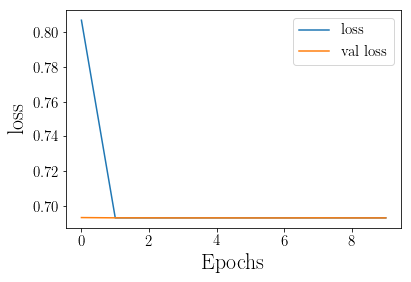

In [37]:
plt.plot(history.history['loss'],     label = 'loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend(loc=0)
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.show()

## Validate the reweighting of $\mathcal{N}(172.5, 30)$ to $\mathcal{N}(175, 30)$

In [38]:
X0_val = np.random.normal(mu0, var0, n_data_points)
X1_val = np.random.normal(mu1, var1, n_data_points)

In [39]:
preds = model.predict(X0_val)
weights = preds[:,1]/preds[:,0]

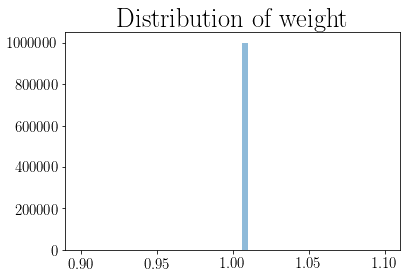

In [42]:
bins = np.linspace(0.9,1.1,50)
plt.hist(weights, bins = bins, alpha = 0.5)[0]
plt.title("Distribution of weight")
plt.show()

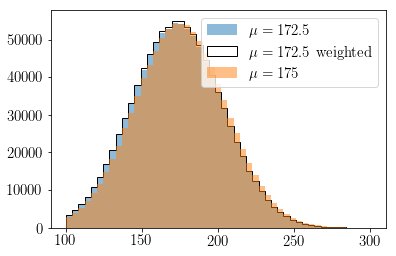

In [53]:
bins = np.linspace(100,300,50)
plt.hist(X0_val, bins = bins, alpha = 0.5, label = r'$\mu=172.5$')
plt.hist(X0_val, bins = bins, label = r'$\mu=172.5$ weighted', weights=weights, histtype='step', color='k')
plt.hist(X1_val, bins = bins, alpha = 0.5, label = r'$\mu=175$')
plt.legend()
plt.show()